# OpenALPR
___

[GitHub_link](https://github.com/openalpr/openalpr)

Подход состоит в том, чтобы переобучить `LBP` каскад на российских номерах.
Подробный гайд есть от самих разработчиков: [link](https://github.com/openalpr/train-detector)

Я обучила детектор сначала на [базе рекогнитовцев](https://yadi.sk/d/EAfnQ947criHW) (на всякий случай [хабрастатья](http://habrahabr.ru/company/recognitor/blog/243919/))
Возможно параметры при обучении были выбраны не очень правильно, а может дело было в самой базе.
В любом случае, обученный каскад приложен в папке.

Я также составила базу из "хороших" номеров. В которой все позитивные примеры были хорошо обрезаны и не встречалось мусора, в отличии от исходной базы. У меня получилось около 600 картинок.
Возможно этого тоже недостаточно для хорошего обучения.

OpenALPR дает возможность использовать свои файлы конфигурации, в которой описаны параметры номерных знаков для постобработки после детектора.
Для России стандарты такие:
<img src="size.png">


А **файл конфигурации** выглядит следующим образом:


# Usage
___

Из openALPR можно получить json, из которого можно вытащить как распознанные номера, так и их координаты на картинке.
 
Но с распознаванием непосредственно букв номера сейчас есть большие проблемы.
Это еще нужно лезть в код и смотреть. Возможно все дело в отсутствии черной разделительной полоски в европейских номерах, конфиг для которых я использовала в качестве референса. (Ну, конечно, дело не только в конфиге)


No license plates found in image: ./examples/1.png
-------------------------------
plate IB4720O
confidence  85.702477


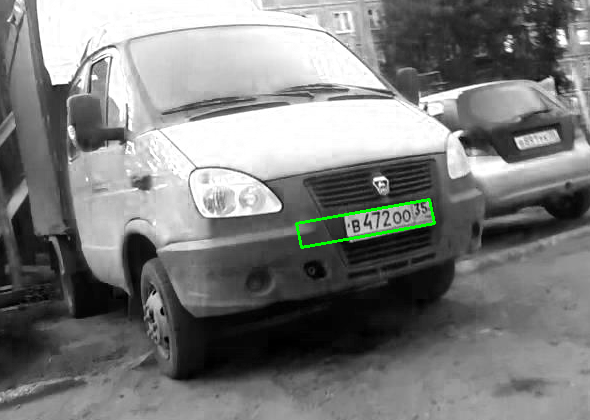

-------------------------------
plate 60EE01
confidence  82.174988


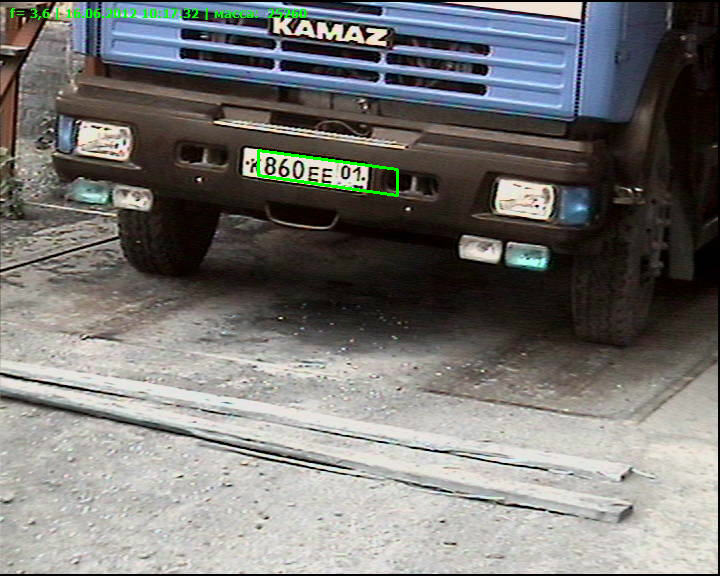

-------------------------------
plate 27K35
confidence  81.343872


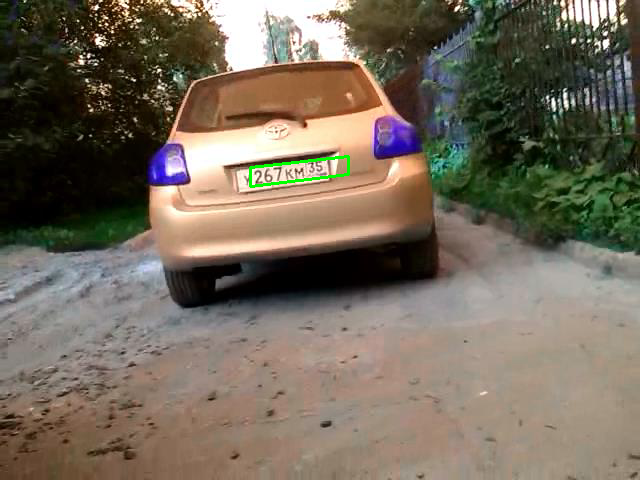

-------------------------------
plate T666YG35
confidence  85.038773


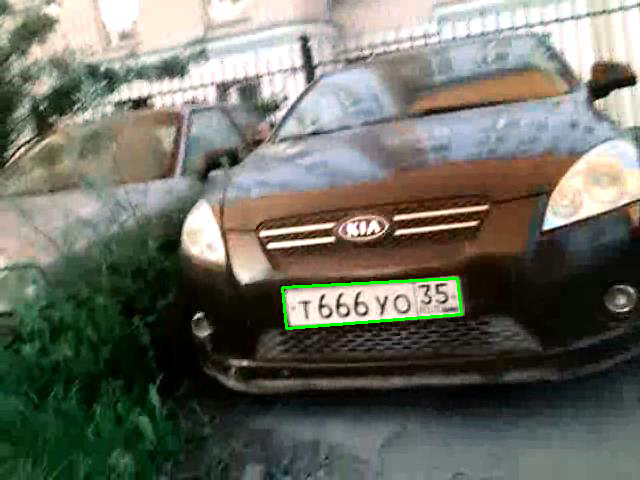

-------------------------------
plate KOM9
confidence  76.745361


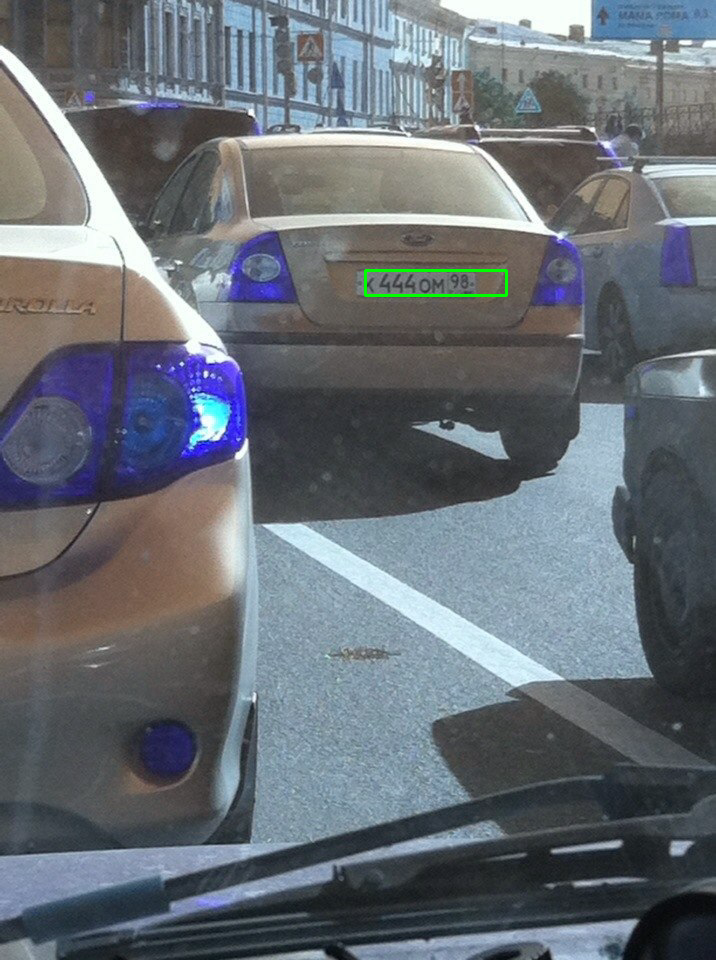

-------------------------------
plate AA5170EX
confidence  89.626099


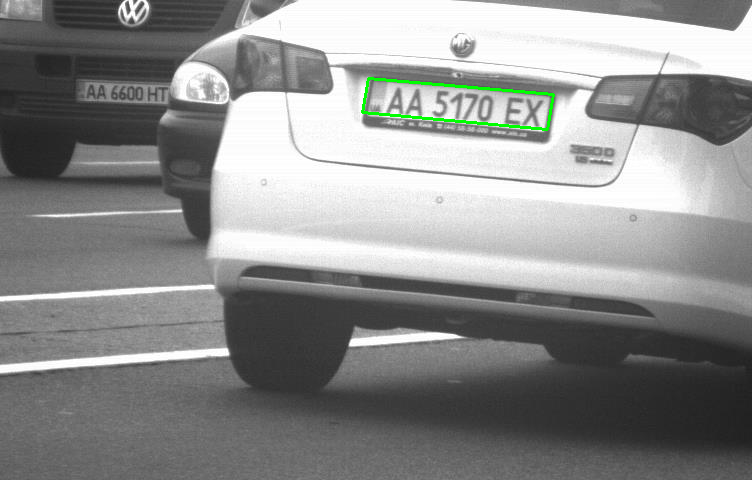

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import sys
import subprocess
import json
from IPython.display import Image
from IPython.display import display
import PIL
from glob import glob
from io import BytesIO


def display_img_array(ima):
    im = PIL.Image.fromarray(ima)
    bio = BytesIO()
    im.save(bio, format='png')
    display(Image(bio.getvalue(), format='png'))

for fn in glob('./examples/*.png'):
    alpr_cmd = "alpr -j -c ru " + fn
    json_ = subprocess.Popen(alpr_cmd, shell=True, stdout=subprocess.PIPE).stdout.read()
    if "No license plates found." in json_:
        print "No license plates found in image: " + fn
        continue
    dic = json.loads(json_)

    print "-------------------------------"
    print "plate " + dic["results"][0]["plate"]
    print "confidence ", dic["results"][0]["confidence"]

    coordinates = dic["results"][0]["coordinates"]
    
    # print coordinates
    x1 = coordinates[0]["x"]
    y1 = coordinates[0]["y"]

    x2 = coordinates[1]["x"]
    y2 = coordinates[1]["y"]
    
    x3 = coordinates[2]["x"]
    y3 = coordinates[2]["y"]
        
    x4 = coordinates[3]["x"]
    y4 = coordinates[3]["y"]
    
    img = cv2.imread(fn)
    
    cv2.line(img, (x1,y1), (x2,y2),(0,255,0),2)
    cv2.line(img, (x2,y2), (x3,y3),(0,255,0),2)
    cv2.line(img, (x3,y3), (x4,y4),(0,255,0),2)
    cv2.line(img, (x1,y1), (x4,y4),(0,255,0),2)
    
    display_img_array(img)

 # Notes
 ____
 
 У меня не очень многое менялось при изменении размеров в конфиге.